### Należy zainstalować dwie biblioteki:
!pip install vaderSentiment

!pip install textblob

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dane_string = pd.read_csv("/home/sokal/Documents/DataScienceKurs/Python/Womens Clothing E-Commerce Reviews.csv")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from textblob import TextBlob

In [25]:
dane_string["Review Text"]=pd.Series(dane_string["Review Text"].fillna("0"))

### Informacje statystyczne o komentarzach

In [7]:
print("{} % klientów poleca zakupiony produkt".format(round(dane_string["Recommended IND"].mean()*100,2)))
print("Średnia ocena produktów: {}".format(round(dane_string["Rating"].mean(),2)))
print("\nW przypadku braku komentarza:")
print("{} % klientów poleca zakupiony produkt".format(round(dane_string[dane_string["Review Text"]=="0"]["Recommended IND"].mean()*100,2)))
print("Średnia ocena produktów: {}".format(round(dane_string[dane_string["Review Text"]=="0"]["Rating"].mean(),2)))
print("\nNajdłuższy komentarz ma {} znaków".format(round(pd.Series(dane_string["Review Text"].str.len()).max(),0)))
print("Średnia liczba znaków w komentarzach: {}".format(round(pd.Series(dane_string["Review Text"].str.len()).mean(),0)))
            
            

82.24 % klientów poleca zakupiony produkt
Średnia ocena produktów: 4.2

W przypadku braku komentarza:
91.6 % klientów poleca zakupiony produkt
Średnia ocena produktów: 4.53

Najdłuższy komentarz ma 508 znaków
Średnia liczba znaków w komentarzach: 298.0


### Przeczytaj konkretny komentarz

In [15]:
def sentiment_vader(sentence):
        sid = SentimentIntensityAnalyzer()
        snt = sid.polarity_scores(sentence)["compound"]
        if snt >= 0:
            return 1
        else:
            return 0

In [16]:
def sentiment_vader_neutral(sentence):
    sid = SentimentIntensityAnalyzer()
    vs = sid.polarity_scores(sentence)["compound"]
    if vs == 0:
        return "Zdanie neutralne"
    elif vs > 0:
        return "Zdanie pozytywne"
    else:
        return "Zdanie negatywne"

In [17]:
def sentiment_text_blob(sentence): 
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity >= 0: 
        return 1
    else:
        return 0

In [18]:
def sentiment_text_blob_neutral(sentence): 
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity == 0: 
        return "Zdanie neutralne"
    elif analysis.sentiment.polarity > 0:
        return "Zdanie pozytywne"
    else:
        return "Zdanie negatywne"

In [19]:
num = input('Podajaj liczbę z przedziału (1-23485), aby przeczytać konkretny\n')
try:
    num = int(num)
    if num > 0 and num <= 23485:
        text = dane_string["Review Text"][num-1]
        rekomendacja = dane_string["Recommended IND"][num-1]
        print(f"Komentarz numer {num}:\n\n {text}")
        print(f"\nRekomendajca klienta: {'Tak' if rekomendacja == 1 else 'Nie'}")
        print(f"\nRekomendacja według biblioteki Text Blob: {'Tak' if sentiment_text_blob(text)== 1 else 'Nie'}")
        print(f"\nRekomendacja według biblioteki Vader Sentiment: {'Tak' if sentiment_vader(text) == 1 else 'Nie'}")           
    else:
        print("Podałeś złą wartość")
except ValueError:
    print(f"{num} - nie jest poprawną warością")

Podajaj liczbę z przedziału (1-23485), aby przeczytać konkretny
234
Komentarz numer 234:

 These jeans! i tried these on, in addition to the high rise paige denim, and these won out hands down. classic flattering fit from mother, with an element of edginess with the frayed hem. these are long enough on me (i'm 5'5') to cuff at the ankle if i don't want a distressed look on a particular day. they are slightly stretchy like other mother denim but not so much that i would size down. i have muscular calves and thighs, but someone who does not could likely size down and be happy with the a

Rekomendajca klienta: Tak

Rekomendacja według biblioteki Text Blob: Tak

Rekomendacja według biblioteki Vader Sentiment: Tak


### Wyszukaj komentarze zawierające konkretne słowo

In [30]:
slowo = input("Wyszukaj komentarze zawierające podane słowo: ")
pd.set_option('display.max_colwidth', -1)
wynik_index = dane_string['Review Text'].str.contains(slowo)
if dane_string["Review Text"][dane_string.index[wynik_index]].empty:
    print(f"Nie znaleziono komentarza ze slowem {slowo}") 
else:
    print(dane_string["Review Text"][dane_string.index[wynik_index]]+ "\n")

Wyszukaj komentarze zawierające podane słowo: medical
4616     This top can be dressed up or down. i got it in the blue motif. it is so cute and that wearable, washable fabric. i am a medical student so it is important for me to be able to wash my clothing and not wear things too low-cut (i.e. professionalism). this top fits the bill while still being fabulous. of course it is loose-fitting on the bottom, as the image indicates. it is a swing top. i recommend with skinny pants.\n
19148    I love maeve dresses but there are several issues with this one (for my taste). 1) the fabric and color closely resembles my medical scrubs, 2) the zipper is cheap and barely goes up or down, even when it's just on the hanger. 3) the bow is really cute but doesn't make up for the other shortcomings.\n                                                                                                                       
Name: Review Text, dtype: object


### Zobacz chmurę najpopularniejszych słów w komentarzach

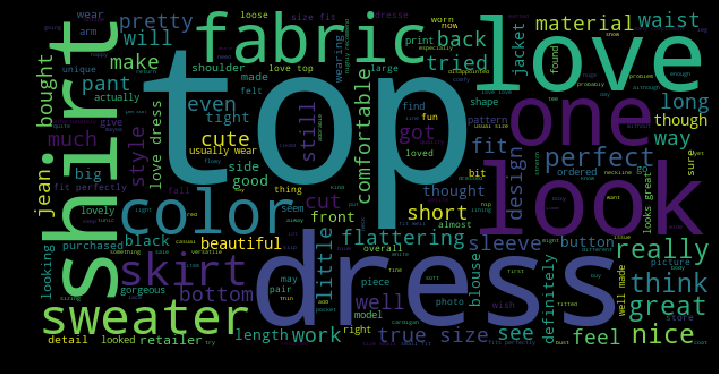

In [26]:
text = ' '.join(dane_string["Review Text"])
wordcloud = WordCloud(width=600, height=300).generate(text)
plt.figure( figsize=(10,5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Przetestuj biblioteki oceniające, czy dany tekst jest pozytywny, czy negatywny, wpisując własną sentencje

In [29]:
sentencja = input("Podaj sentencję: \n")
print(f"Według biblioteki Vader: {sentiment_vader_neutral(sentencja)}")
print(f"Według biblioteki Text Blob: {sentiment_text_blob_neutral(sentencja)}")

Podaj sentencję: 
I like you
Według biblioteki Vader: Zdanie pozytywne
Według biblioteki Text Blob: Zdanie neutralne
